In [1]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [2]:
#read dataset csv file.
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# find the features and observation in the data set.
data.shape

(10000, 14)

In [4]:
#Getting details of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
#getting info about of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f017fd0c518>,
      dtype=object)

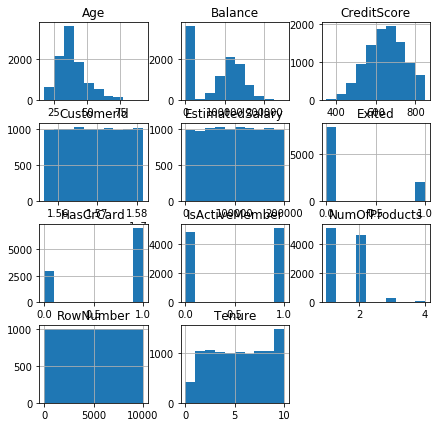

In [6]:
#visualizind distribution
data.hist(figsize = (7,7))

In [7]:
# #Dropping irrelevant data
# dropped = ["RowNumber", "CustomerId", "Surname"]
# for i in range(len(dropped)):
#     del data[dropped[i]]
# data.head()

In [8]:
data.shape

(10000, 14)

In [9]:
# #Dividing data
# Y = pd.DataFrame(data.Exited)
# X = data.drop(columns = ["Exited"])
# X = np.array(X)
# Y = np.array(Y)
# X.shape, Y.shape

In [10]:
X = data.iloc[:,3:13].values
Y = data.iloc[:,13].values 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_1 = LabelEncoder()
X[:, 1] = le_1.fit_transform(X[:, 1])

le_2 = LabelEncoder()
X[:, 2] = le_2.fit_transform(X[:,2])


In [11]:
X, Y = shuffle(X, Y, random_state = 5)

In [12]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.23)

In [13]:
l_rate = 0.001
epochs = 1000
cost_history = np.empty(shape = [1], dtype = float)
n_dim = X.shape[1]
n_class = 2
model_path = "/home/admin1/Machine learning"

In [14]:
#Defining the number of hidden layers and number of neurons 
n_hidden_1 = 78
n_hidden_2 = 48
n_hidden_3 = 82
n_hidden_4 = 72
n_hidden_5 = 69


x = tf.placeholder(tf.float32,[None, n_dim])

w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))

y1 = tf.placeholder(tf.float32,[None, n_class])


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
def multilinear_perceptron(x, weight, biases):
    layer_1 = tf.add(tf.matmul(x, weight['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weight['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weight['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)

    layer_4 = tf.add(tf.matmul(layer_3, weight['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)

    layer_5 = tf.add(tf.matmul(layer_4, weight['h5']), biases['b5'])
    layer_5 = tf.nn.sigmoid(layer_5)
    
    out_layer = tf.matmul(layer_5, weight['out']) + biases['out']
    
    return out_layer


In [16]:
#defining weights and biases for each layer
weights = {
    'h1':tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5':tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_5, n_class]))
  
}

biases = {
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'b5':tf.Variable(tf.truncated_normal([n_hidden_5])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
  
}

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [17]:
y = multilinear_perceptron(x, weights, biases)

In [18]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y, labels = y1))
training_step = tf.train.GradientDescentOptimizer(l_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []


for epoch in range(epochs):
    sess.run(training_step, feed_dict = {x:train_x, y:train_y})
    cost = sess.run(cost_function, feed_dict = {x:train_x, y:train_y})
    cost_history = np.append(cost_history, cost)
    correct_pred = tf.equal(tf.argmax(y,1), tf.argmax(y1,1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    pred_y = sess.run(y, feed_dict = {x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse1 = sess.run(mse)
    mse_history.append(mse1)
    accuracy = sess.run(accuracy, feed_dict = {x:train_x, y:train_y})
    accuracy_history.append(accuracy)
    
    save_path = saver.save(sess, model_path)
    
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

correct_pred = tf.equal(tf.argmax(y,1), tf.argmax(y1,1))
accuracy = tf.reduce(tf.cast(correct_pred, tf.float32))
print(accuracy)

pred_y = sess.run(y, feed_dict = {x:test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print(mse)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



ValueError: Cannot feed value of shape (7700,) for Tensor 'add_5:0', which has shape '(?, 2)'